In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
matplotlib.style.use('ggplot')

Practically speaking, the Central limit theorm says  the following :

The distribution of the sum of n i.i.d random variables (Xi) converges to a normal distribution as the number of samples (n) gets larger and larger!

In simple words if you draw n i.i.d samples of a certain distribution, add them up, and plot a histogram of the result,
you will get a distribution that approximates to a NORMAL distribution! (provided that n is sufficiently large) 

The most amazing part is that it the distribution of the random variables (Xi) do not matter!!!

Central Limit Theorem is considered one of the most powerful and elegant results of Probability Theory

Central Limit Theorem says much more that this (for example : about the mean and the variance of the normal distribution)

Theoritically, Central Limit Theorem says the following :



\begin{equation*} 
\lim_{n \to \infty} \mathbf{P} \ ( \mathbf{{Z_n}\ {\leq} \  {z}} ) = \phi(\mathbf{z})
\end{equation*}

                                            where :
\begin{equation*} 
\mathbf{Z}_n = \frac {\mathbf{S}_n - n\mu}{\sqrt{n} * \sigma}
\end{equation*}

\begin{equation*} 
\mathbf{S}_n = \mathbf{X}_1 + \mathbf{X}_2 + \mathbf{X}_3 +\  ...+\  \mathbf{X}_n
\end{equation*}

\begin{equation*} 
\mathbf{X}_i \sim i.i.d
\end{equation*}

\begin{equation*} 
\phi \sim CDF_{NORMAL(0,1)}
\end{equation*}


                That is, it's the Standardized Mean that converges to the Standard Normal and not simply sum
                (but for practical purposes it doesn't matter much 
                (because the linear function of a NORMAL is also a NORMAL))

\begin{align} 
\mathbf{S}_n = \sqrt{n} . \mathbf{Z}_n . \sigma + n\mu
\end{align}
    
                i.e here, Sn is also NORMAL because Zn is NORMAL
    
                Also, its the CDF and not PDF that converges 
 

In [2]:
# configuration
num_samples = 5000  # no of iid random variables to add (the higher this number the better the approximation)
num_draws = 8000  # no of samples(sums) that we want to draw 
num_bins  = 200    # how finely we want to divide the histogram

# uniform distribution  :
start = 0
end = 1
uniform_samples = lambda numSamples : np.random.uniform(start, end, numSamples)

# exponential distribution : 
_lambda = 0.5
exponential_samples = lambda numSamples : np.random.exponential(1/_lambda, numSamples)

Now we simply to verify that the random number generator that we have does infact gives values from the stated distribution.

The uniform distribution gives (almost) unifrom values from the said range.
The exponential distribution gives values that tend to be closer to 0 with high probability.

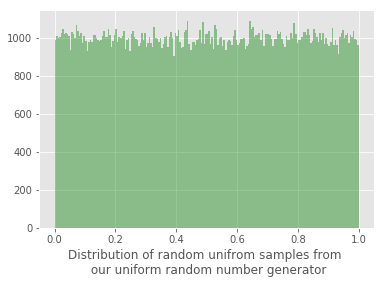

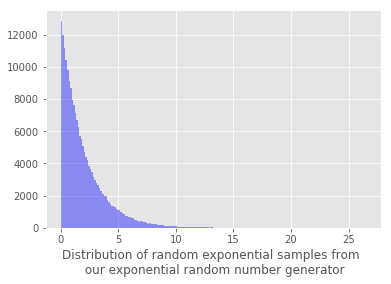

In [3]:
# verify that the function does infact gives values of the desired distribution
sns.distplot(uniform_samples(200000), kde=False, bins=num_bins, color="green");
plt.xlabel("Distribution of random unifrom samples from \n our uniform random number generator")
plt.show()

sns.distplot(exponential_samples(200000),kde=False, bins=num_bins, color="blue");
plt.xlabel("Distribution of random exponential samples from \n our exponential random number generator")
plt.show()

Now Let's verify the Central Limit Theorem

In [6]:
# draw <num_draws> number of samples where each sample = sum(X1, X2, .... X<num_samples>)
# all Xi are independent and identically distributed
uniform_draws = [sum(uniform_samples(num_samples)) for i in range(num_draws)]
exponential_draws = [sum(exponential_samples(num_samples)) for i in range(num_draws)]

You will observe that the distribution of the sums will tend to converge to NORMAL distribution

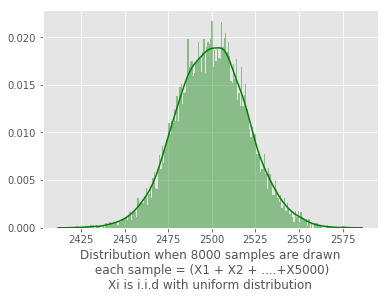

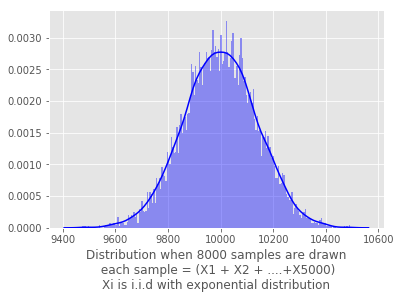

In [7]:
# visualize the distribution for sample drawn from unifrom distribution
sns.distplot(uniform_draws, bins=num_bins, hist=True, color="green")
plt.xlabel("Distribution when " + str(num_draws) + " samples are drawn\n each sample = (X1 + X2 + ....+X"
           +  str(num_samples) + ")\nXi is i.i.d with uniform distribution")
plt.show()

# visualize the distribution for sample drawn from exponential distribution
sns.distplot(exponential_draws, bins=num_bins, hist=True, color="blue")
plt.xlabel("Distribution when " + str(num_draws) + " samples are drawn\n each sample = (X1 + X2 + ....+X"
           + str(num_samples) + ")\nXi is i.i.d with exponential distribution")
plt.show()